In [1]:
import pandas as pd

In [8]:
df = pd.read_excel("datasets/titanic3.xls", engine="xlrd")
print(df.head())

   pclass  survived                                             name     sex  \
0       1         1                    Allen, Miss. Elisabeth Walton  female   
1       1         1                   Allison, Master. Hudson Trevor    male   
2       1         0                     Allison, Miss. Helen Loraine  female   
3       1         0             Allison, Mr. Hudson Joshua Creighton    male   
4       1         0  Allison, Mrs. Hudson J C (Bessie Waldo Daniels)  female   

       age  sibsp  parch  ticket      fare    cabin embarked boat   body  \
0  29.0000      0      0   24160  211.3375       B5        S    2    NaN   
1   0.9167      1      2  113781  151.5500  C22 C26        S   11    NaN   
2   2.0000      1      2  113781  151.5500  C22 C26        S  NaN    NaN   
3  30.0000      1      2  113781  151.5500  C22 C26        S  NaN  135.0   
4  25.0000      1      2  113781  151.5500  C22 C26        S  NaN    NaN   

                         home.dest  
0                     St 

In [9]:
# Drop or fill NaNs
df['age'] = df['age'].fillna(df['age'].median())
df.drop(columns=['body', 'cabin'], inplace=True)  # if too many missing

# Check for missing values
df.isnull().sum().sort_values(ascending=False)

boat         823
home.dest    564
embarked       2
fare           1
pclass         0
survived       0
name           0
sex            0
age            0
sibsp          0
parch          0
ticket         0
dtype: int64

In [10]:
df.describe(include="all")

,pclass,survived,name,sex,age,sibsp,parch,ticket,fare,embarked,boat,home.dest
count,1309.000000,1309.000000,1309,1309,1309.000000,1309.000000,1309.000000,1309,1308.000000,1307,486,745
unique,NaN,NaN,1307,2,NaN,NaN,NaN,939,NaN,3,28,369
top,NaN,NaN,"Connolly, Miss. Kate",male,NaN,NaN,NaN,CA. 2343,NaN,S,13,"New York, NY"
freq,NaN,NaN,2,843,NaN,NaN,NaN,11,NaN,914,39,64
mean,2.294882,0.381971,NaN,NaN,29.503183,0.498854,0.385027,NaN,33.295479,NaN,NaN,NaN
std,0.837836,0.486055,NaN,NaN,12.905246,1.041658,0.865560,NaN,51.758668,NaN,NaN,NaN
min,1.000000,0.000000,NaN,NaN,0.166700,0.000000,0.000000,NaN,0.000000,NaN,NaN,NaN
25%,2.000000,0.000000,NaN,NaN,22.000000,0.000000,0.000000,NaN,7.895800,NaN,NaN,NaN
50%,3.000000,0.000000,NaN,NaN,28.000000,0.000000,0.000000,NaN,14.454200,NaN,NaN,NaN
75%,3.000000,1.000000,NaN,NaN,35.000000,1.000000,0.000000,NaN,31.275000,NaN,NaN,NaN


<p><b>pclass</b>: Values 1–3, average ~2.29, indicating most were 2nd or 3rd class</p>
<p><b>survived</b>: Binary (0 or 1), ~38.2% survived</p>
<p><b>age</b>: Mean ~29.5, median ~28, range 0.17 to 80, has missing values</p>
<p><b>sibsp</b>: Most passengers traveled alone (mean ~0.5)</p>
<p><b>parch</b>: Few had parents/children aboard (mean ~0.38)</p>
<p><b>fare</b>: Wide variation, from free (0) to very expensive (~512)</p>
<p><b>ticket</b>: 939 unique values – needs cleaning or encoding</p>
<p><b>embarked</b>: 3 values (S, C, Q), most common: S (Southampton)</p></p>
<p><b>home.dest</b>: 745 non-null, 369 unique, top = “New York, NY”

In [11]:
# Encode categorical columns
df['sex'] = df['sex'].map({'male': 0, 'female': 1})
df = pd.get_dummies(df, columns=['embarked'], drop_first=True)

Text(0.5, 1.0, 'Survival Rate by Passenger Class')

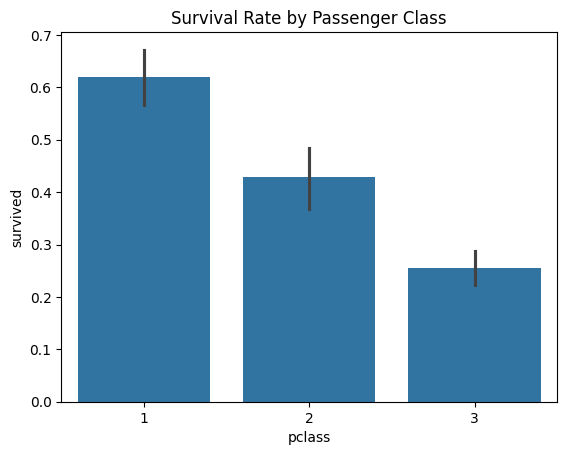

In [13]:
import matplotlib.pyplot as plt
import seaborn as sns

# Basic visualisations
sns.barplot(x='pclass', y='survived', data=df)
plt.title("Survival Rate by Passenger Class")

Text(0.5, 1.0, 'Survival Rate by Gender')

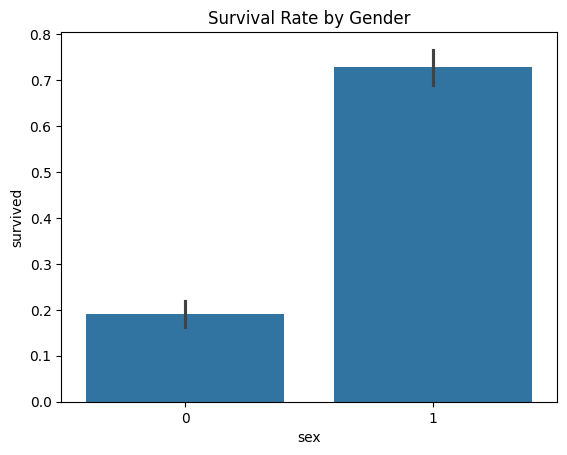

In [14]:
sns.barplot(x='sex', y='survived', data=df)
plt.title("Survival Rate by Gender")

Male = 0, Female = 1

Text(0.5, 1.0, 'Age Distribution')

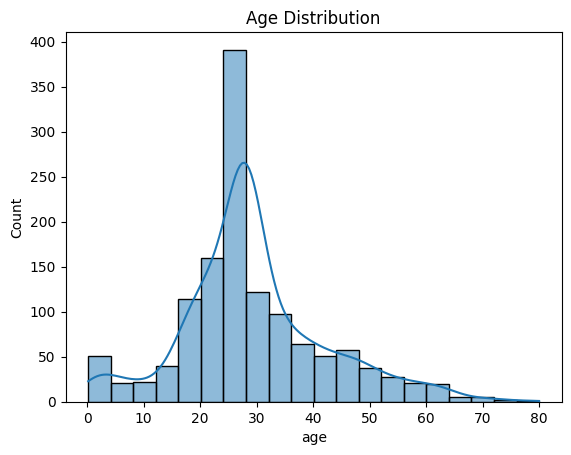

In [15]:
sns.histplot(df['age'], bins=20, kde=True)
plt.title("Age Distribution")

<Axes: xlabel='age', ylabel='Count'>

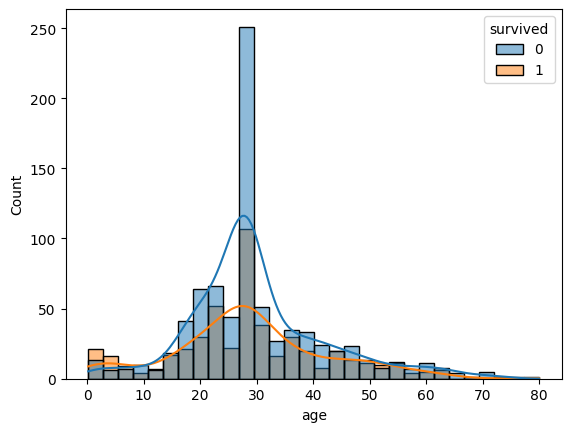

In [17]:
# Was age a stronger or weaker predictor than class or gender?
df[['age', 'pclass', 'sex', 'survived']].corr() # Correlation with survived

sns.histplot(data=df, x='age', hue='survived', bins=30, kde=True)

In [18]:
from scipy.stats import chi2_contingency

# Chi-Square Test for survival by gender
pd.crosstab(df['sex'], df['survived'])
chi2_contingency(pd.crosstab(df['sex'], df['survived']))

Chi2ContingencyResult(statistic=363.6179084388249, pvalue=4.589924936952945e-81, dof=1, expected_freq=array([[520.99847212, 322.00152788],
       [288.00152788, 177.99847212]]))

With p-value of ~4.58e-81 this makes gender extremely significant

In [24]:
from scipy.stats import ttest_ind

# T-Test for age difference between survived and died
t_stat, p_val = ttest_ind(df[df.survived==1]['age'].dropna(), df[df.survived==0]['age'].dropna())

import numpy as np

def cohens_d(x, y):
    nx, ny = len(x), len(y)
    pooled_std = np.sqrt(((nx - 1)*x.std()**2 + (ny - 1)*y.std()**2) / (nx + ny - 2))
    return (x.mean() - y.mean()) / pooled_std

In [22]:
from sklearn.linear_model import LogisticRegression
from sklearn.model_selection import train_test_split

X = df[['age', 'pclass', 'sex']]
y = df['survived']

# Fill missing age
X = df[['age', 'pclass', 'sex']].copy()
X['age'] = X['age'].fillna(X['age'].median())

X_train, X_test, y_train, y_test = train_test_split(X, y, stratify=y)

model = LogisticRegression()
model.fit(X_train, y_train)

coef_df = pd.DataFrame({'feature': X.columns, 'coefficient': model.coef_[0]})
print(coef_df)

  feature  coefficient
0     age    -0.028390
1  pclass    -1.015620
2     sex     2.369745


<b>Conclusion:</b> Gender is by far the strongest predictor, followed by class, and then age (weak but not negligible).

In [25]:
survived_ages = df[df['survived'] == 1]['age'].dropna()
died_ages = df[df['survived'] == 0]['age'].dropna()

d = cohens_d(survived_ages, died_ages)
print(f"Cohen's d for age between survivors and non-survivors: {d:.3f}")


Cohen's d for age between survivors and non-survivors: -0.090


We can conclude that age has very small effect size, so it isn’t a strong differentiator

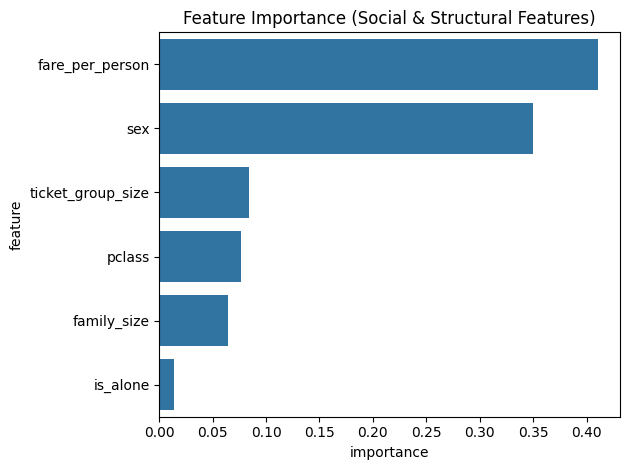

In [28]:
from sklearn.ensemble import RandomForestClassifier

# Feature engineering
df['family_size'] = df['sibsp'] + df['parch']
df['is_alone'] = (df['family_size'] == 0).astype(int)
df['fare_per_person'] = df['fare'] / (df['family_size'] + 1)
df['fare_per_person'] = df['fare_per_person'].fillna(df['fare_per_person'].median())

# Make ticket group size feature (assumming grouped passengers likely to share fate)
ticket_counts = df['ticket'].value_counts()
df['ticket_group_size'] = df['ticket'].map(ticket_counts)

# Select new interesting features
features = ['fare_per_person', 'family_size', 'is_alone', 'ticket_group_size', 'sex', 'pclass']
X_rf = df[features].copy()
X_rf['ticket_group_size'] = X_rf['ticket_group_size'].fillna(1)  # If missing, assume solo
X_rf['fare_per_person'] = X_rf['fare_per_person'].fillna(X_rf['fare_per_person'].median())
X_rf['sex'] = df['sex']  # already encoded

y_rf = df['survived']

# Train-test split
X_train_rf, X_test_rf, y_train_rf, y_test_rf = train_test_split(X_rf, y_rf, stratify=y_rf)

# Train Random Forest
rf = RandomForestClassifier(n_estimators=100, random_state=42)
rf.fit(X_train_rf, y_train_rf)

# Feature importance
importances = rf.feature_importances_
feat_df = pd.DataFrame({'feature': X_rf.columns, 'importance': importances})
feat_df = feat_df.sort_values(by='importance', ascending=False)

# Plot
sns.barplot(data=feat_df, x='importance', y='feature')
plt.title('Feature Importance (Social & Structural Features)')
plt.tight_layout()
plt.show()


<h3>Summary of Random Forest model:</h3>

<p>Our model focused on structural and social features, going beyond basic demographics. The most important insights:</p>
<ul>
  <li>Fare per person was the strongest predictor. This suggests that economic status, especially when adjusted for group size, had a direct impact on survival, likely reflecting access to safer locations or earlier evacuation.</li>

  <li>Sex remained a very strong predictor, consistent with historical policy and behaviour that prioritised women.</li>
    
  <li>Ticket group size also showed a noticeable effect. People traveling with others on the same ticket may have had coordinated movement or faced similar outcomes, reflecting real social bonds beyond just family ties.</li>
    
  <li>Passenger class, family size, and being alone had less influence than expected. As for passenger class, the fare per person feature used in the model is more precise which caused the importance of passenger class to drop because its role is already partially covered.</li>
  
  <li>Notably, being alone had very minimal impact, possibly indicating that survival decisions were not primarily driven by whether someone had immediate relatives on board.</li>
</ul>

<p>This reinforces that both economic and structural factors, in addition to gender, played a central role in survival outcomes.</p>